In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [53]:
df = pd.read_csv('https://raw.githubusercontent.com/riodev1310/rio_datasets/refs/heads/main/black_friday_data.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# Làm sạch dữ liệu


Vì đây là data raw về số lượng mua hàng trong dịp Black Friday nên các giá trị hàng hóa 2 và 3 bị thiếu có thể tính là 0 

Tức khách hàng kh mua các sản phẩm ở danh mục 2 và 3

***=> Có thể fillna được mà không làm mất một lượng lớn dữ liệu (~70%) nếu xóa đi các dòng có giá trị thiếu!***

In [4]:
df = df.fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          537577 non-null  float64
 10  Product_Category_3          537577 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [5]:
Q1 = df['Purchase'].quantile(0.25)
Q3 = df['Purchase'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Purchase'] >= lower_bound) & (df['Purchase'] <= upper_bound)]
print(f"Original DataFrame shape: (537577, 12)")
print(f"DataFrame shape after outlier removal: {df.shape}")
df.info()

Original DataFrame shape: (537577, 12)
DataFrame shape after outlier removal: (534912, 12)
<class 'pandas.core.frame.DataFrame'>
Index: 534912 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     534912 non-null  int64  
 1   Product_ID                  534912 non-null  object 
 2   Gender                      534912 non-null  object 
 3   Age                         534912 non-null  object 
 4   Occupation                  534912 non-null  int64  
 5   City_Category               534912 non-null  object 
 6   Stay_In_Current_City_Years  534912 non-null  object 
 7   Marital_Status              534912 non-null  int64  
 8   Product_Category_1          534912 non-null  int64  
 9   Product_Category_2          534912 non-null  float64
 10  Product_Category_3          534912 non-null  float64
 11  Purchase                    534912 non-null 

***-> Đã loại được 2798 dòng giá trị Outliers***

In [6]:
df['Age'] = df['Age'].astype('category')
df['City_Category'] = df['City_Category'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['Marital_Status'] = df['Marital_Status'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 534912 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     534912 non-null  int64   
 1   Product_ID                  534912 non-null  object  
 2   Gender                      534912 non-null  category
 3   Age                         534912 non-null  category
 4   Occupation                  534912 non-null  int64   
 5   City_Category               534912 non-null  category
 6   Stay_In_Current_City_Years  534912 non-null  object  
 7   Marital_Status              534912 non-null  category
 8   Product_Category_1          534912 non-null  int64   
 9   Product_Category_2          534912 non-null  float64 
 10  Product_Category_3          534912 non-null  float64 
 11  Purchase                    534912 non-null  int64   
dtypes: category(4), float64(2), int64(4), object(2)
memory usage: 3

-> Chỉnh lại type của các cột **Age, Gender, City_Category và Marital_Status** thành kiểu dữ liệu *category*

# Vẽ biểu đồ thống kê các cột dữ liệu


## Biểu đồ thống kê số lượng

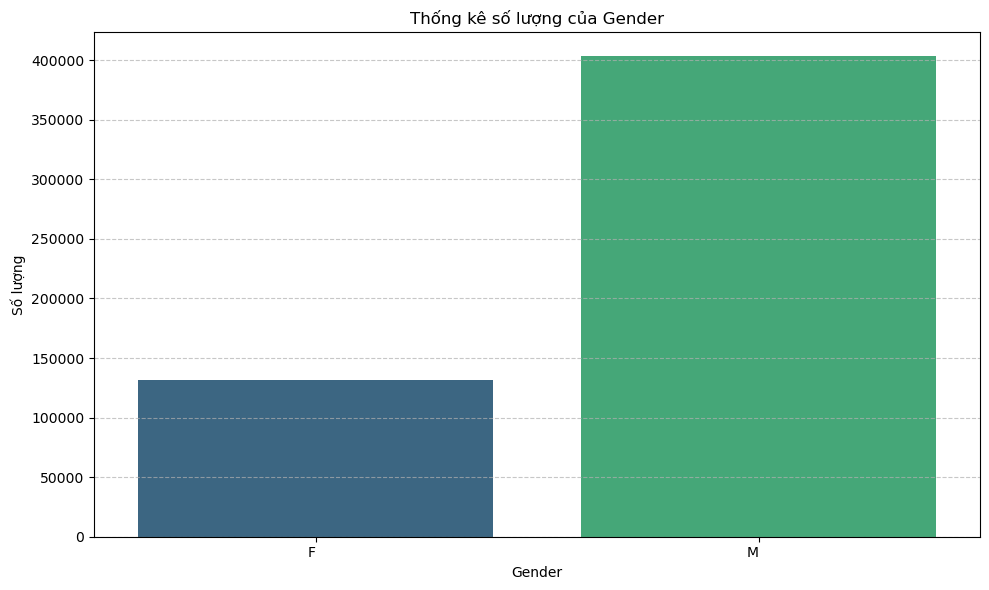

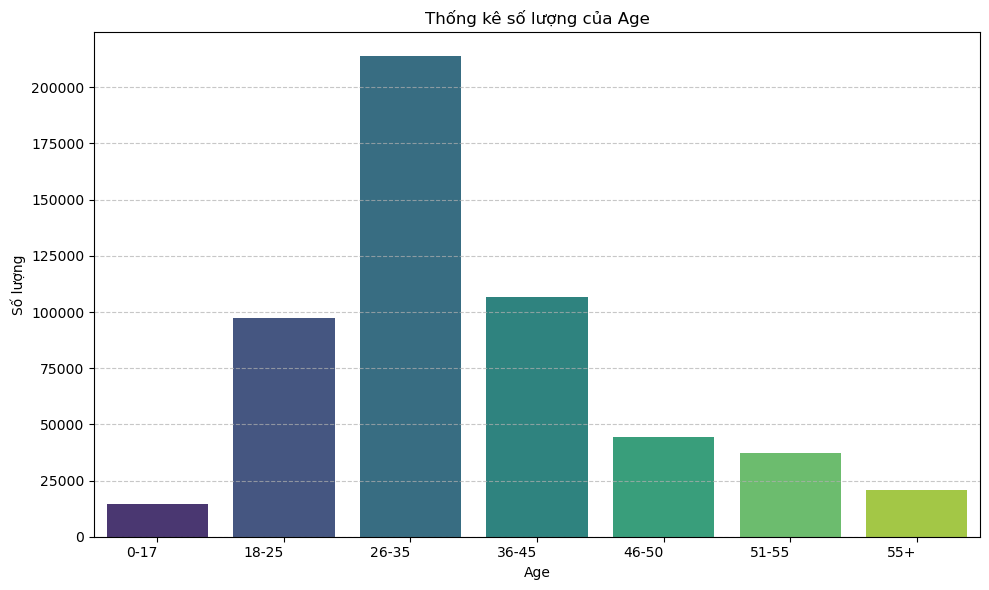

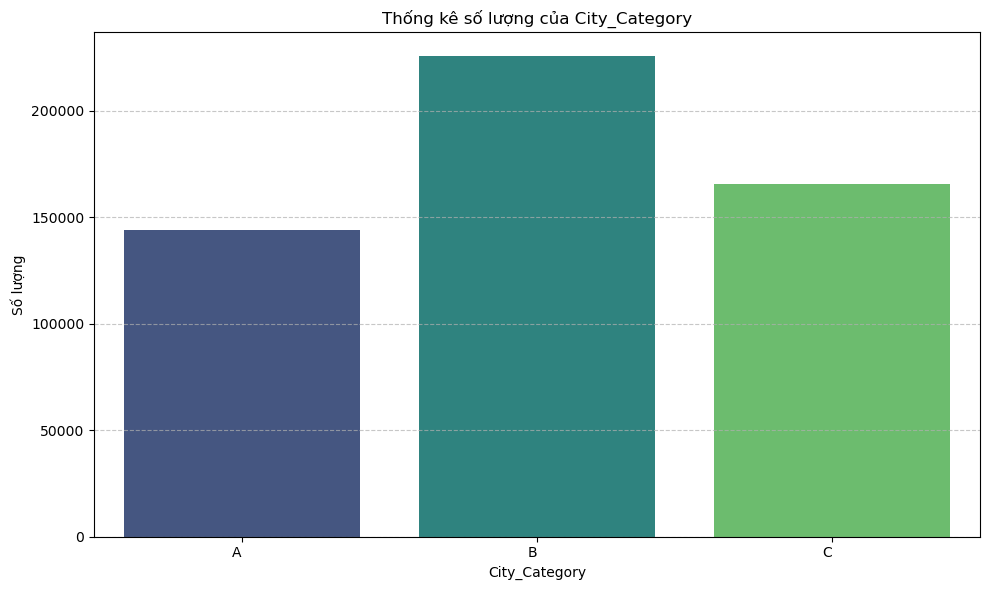

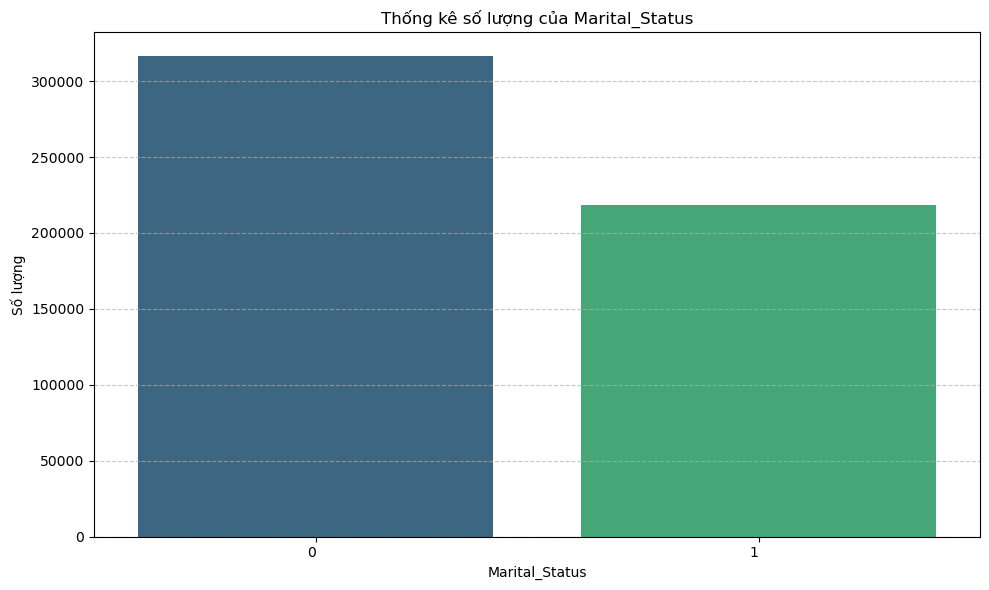

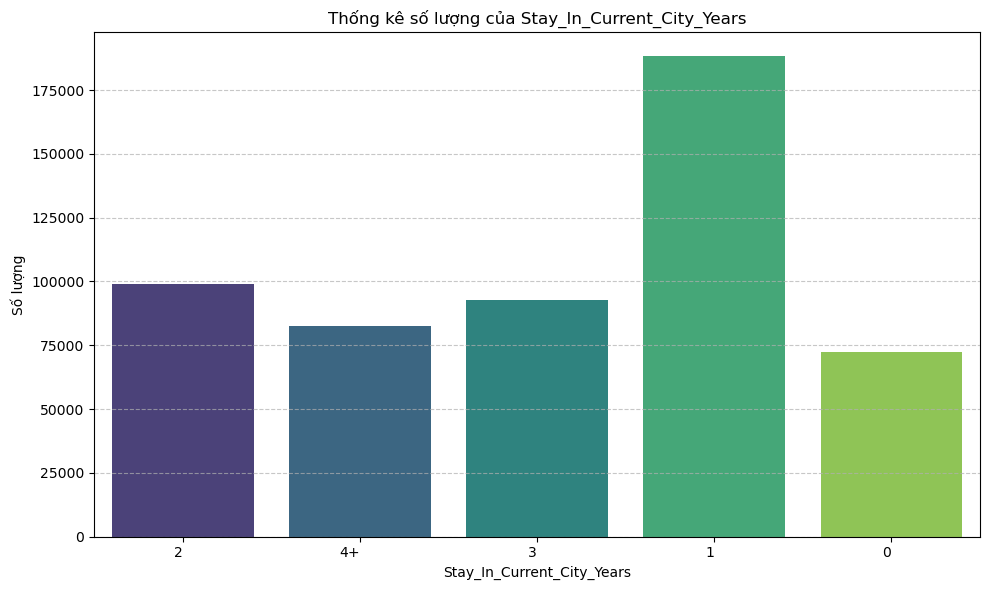

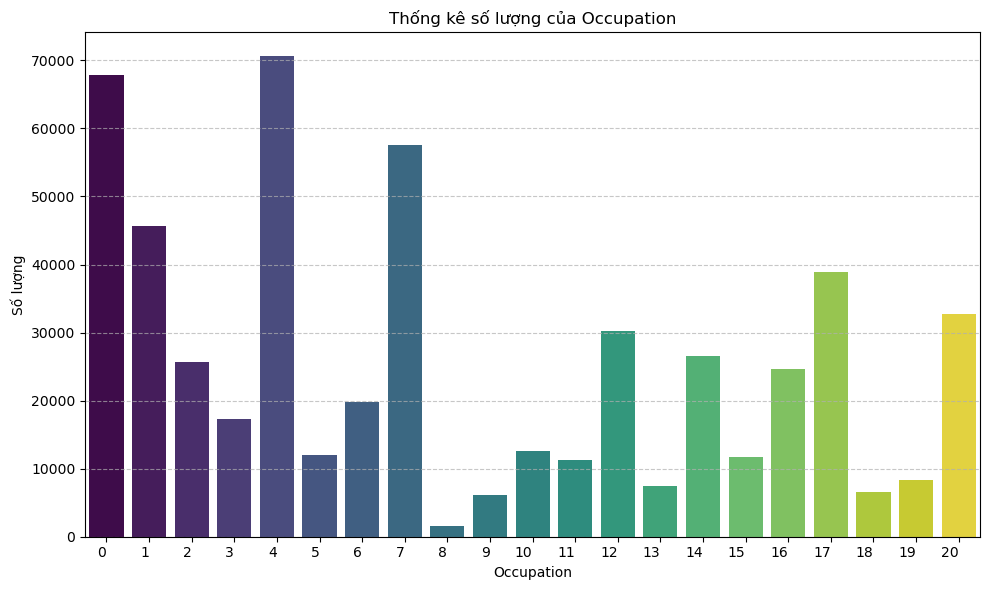

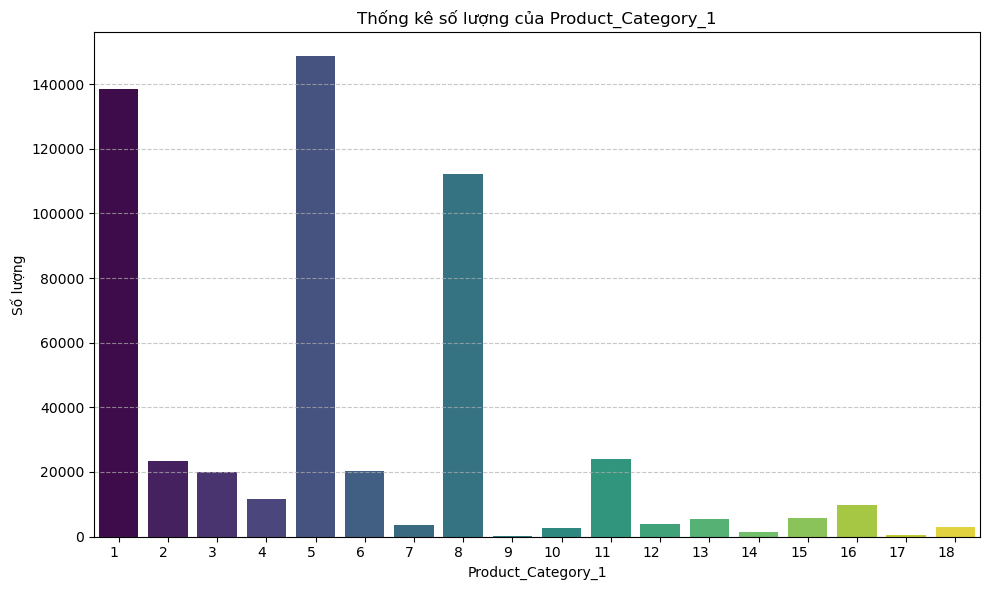

In [37]:
categorical_cols_for_counts = ['Gender', 'Age', 'City_Category', 'Marital_Status', 'Stay_In_Current_City_Years', 'Occupation', 'Product_Category_1']
for col in categorical_cols_for_counts:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df, palette='viridis', hue=col, legend=False)
    plt.title(f'Thống kê số lượng của {col}')
    plt.xlabel(col)
    plt.ylabel('Số lượng')
    plt.xticks(ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

## Biểu đồ phân tích


### Phân tích phân phối mua hàng

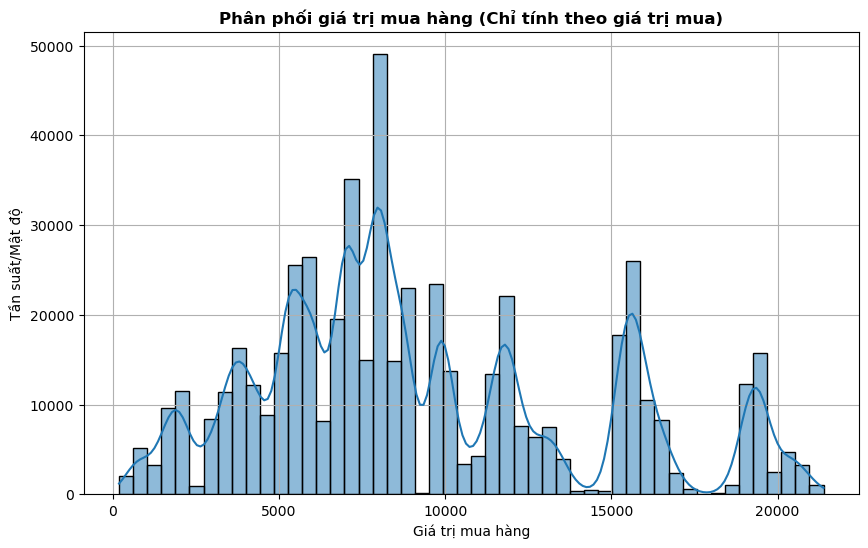

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Purchase'], kde=True, bins=50)
plt.title('Phân phối giá trị mua hàng (Chỉ tính theo giá trị mua)', fontweight = "bold")
plt.xlabel('Giá trị mua hàng')
plt.ylabel('Tần suất/Mật độ')
plt.grid(True)
plt.show()

**Đánh giá chung:**
Biểu đồ cho thấy:

- Phân phối không phải dạng chuẩn (không normal).

- Có rất nhiều đỉnh (multimodal) — không chỉ 2–3 đỉnh mà tới 8–10 đỉnh rõ rệt.

- Trải dài từ khoảng 0 đến hơn 20,000.

- Phần đuôi bên phải dài (right-skewed).

- Mật độ biến động mạnh → không mượt như các phân phối đơn lẻ.

- Có các cụm giá trị “tập trung” tại nhiều nhóm giá mua khác nhau.

**-> Đó là dấu hiệu điển hình của:**

- Nhiều loại sản phẩm khác nhau có mức giá trung bình khác nhau.

- Nhiều phân khúc khách hàng có hành vi chi tiêu khác nhau.

- Có thể tồn tại chính sách giá / mức giảm giá theo hạng mức cố định, tạo ra “đỉnh”


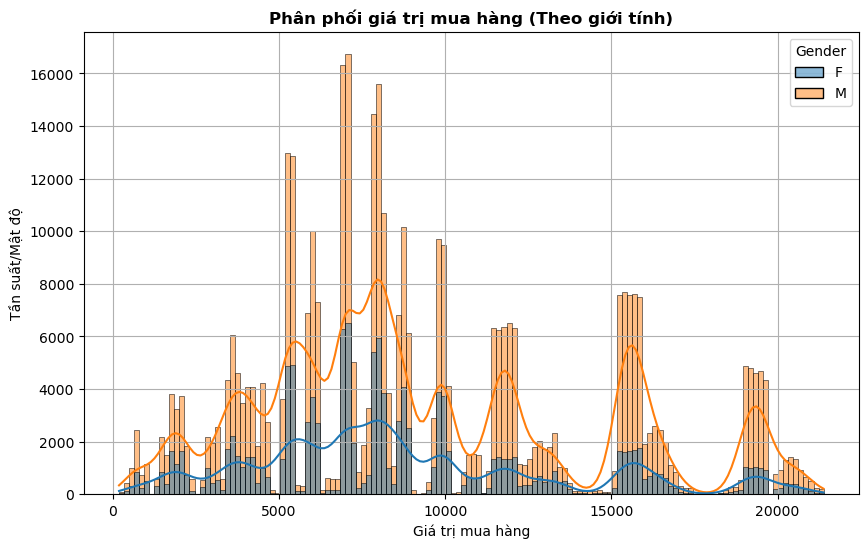

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df, x="Purchase", hue="Gender", kde=True)
plt.title('Phân phối giá trị mua hàng (Theo giới tính)', fontweight = "bold")
plt.xlabel('Giá trị mua hàng')
plt.ylabel('Tần suất/Mật độ')
plt.grid(True)
plt.show()

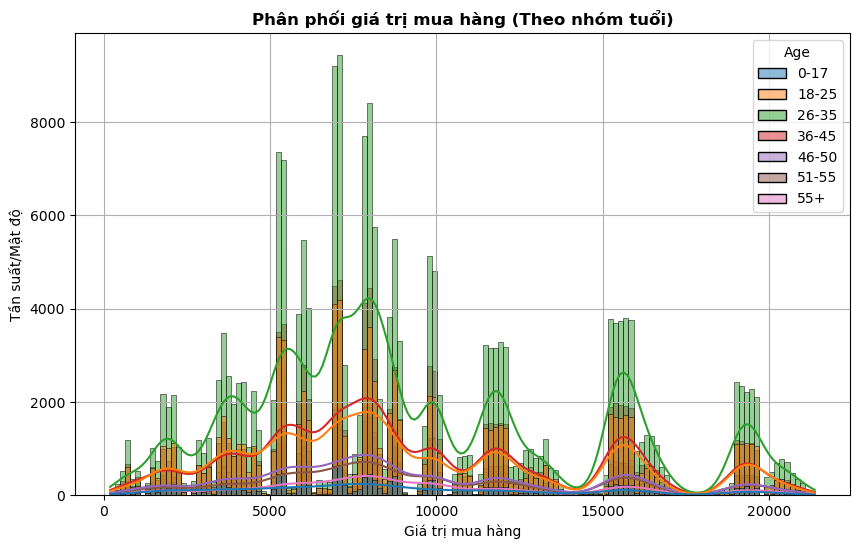

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df, x="Purchase", hue="Age", kde=True)
plt.title('Phân phối giá trị mua hàng (Theo nhóm tuổi)', fontweight = "bold")
plt.xlabel('Giá trị mua hàng')
plt.ylabel('Tần suất/Mật độ')
plt.grid(True)
plt.show()

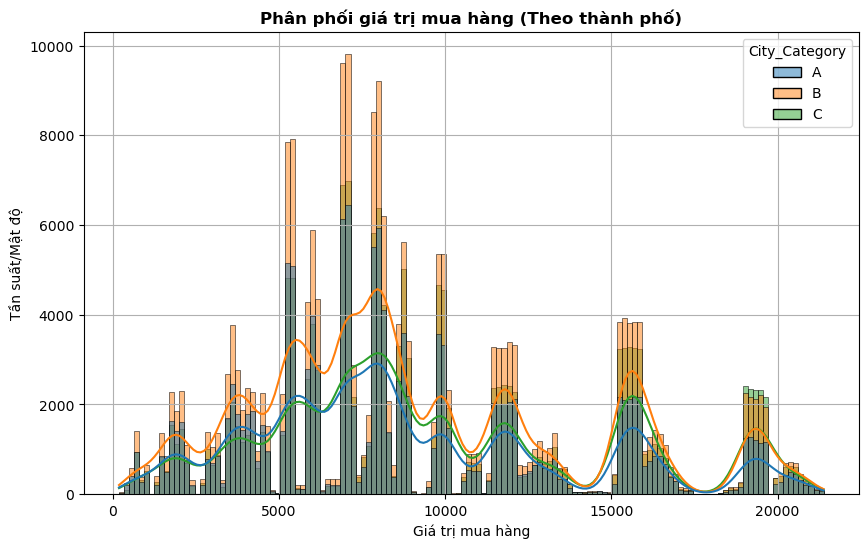

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df, x="Purchase", hue="City_Category", kde=True)
plt.title('Phân phối giá trị mua hàng (Theo thành phố)', fontweight = "bold")
plt.xlabel('Giá trị mua hàng')
plt.ylabel('Tần suất/Mật độ')
plt.grid(True)
plt.show()

### Phân tích tổng doanh thu theo giới tính

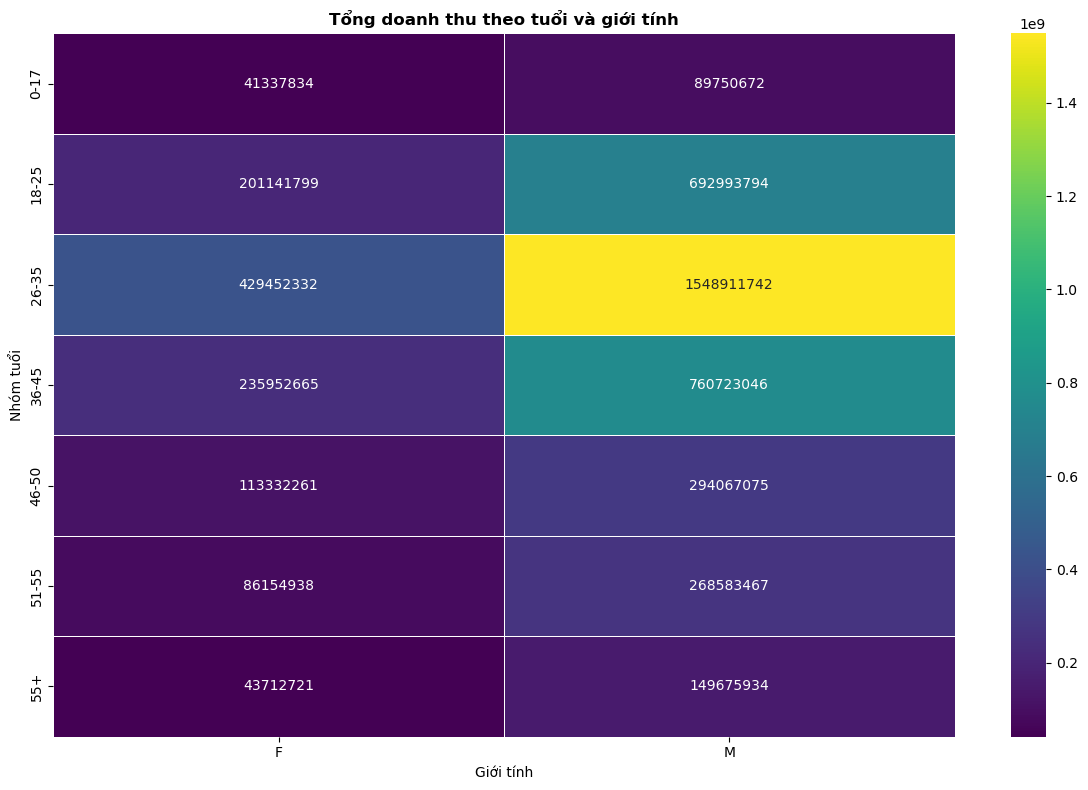

In [12]:
total_purchase_by_age_gender = df.groupby(['Age', 'Gender'], observed=False)['Purchase'].sum().unstack(level='Gender')

plt.figure(figsize=(12, 8))
sns.heatmap(total_purchase_by_age_gender, annot=True, fmt='.0f', cmap='viridis', linewidths=.5)
plt.title('Tổng doanh thu theo tuổi và giới tính', fontweight = "bold")
plt.xlabel('Giới tính')
plt.ylabel('Nhóm tuổi')
plt.tight_layout()
plt.show()

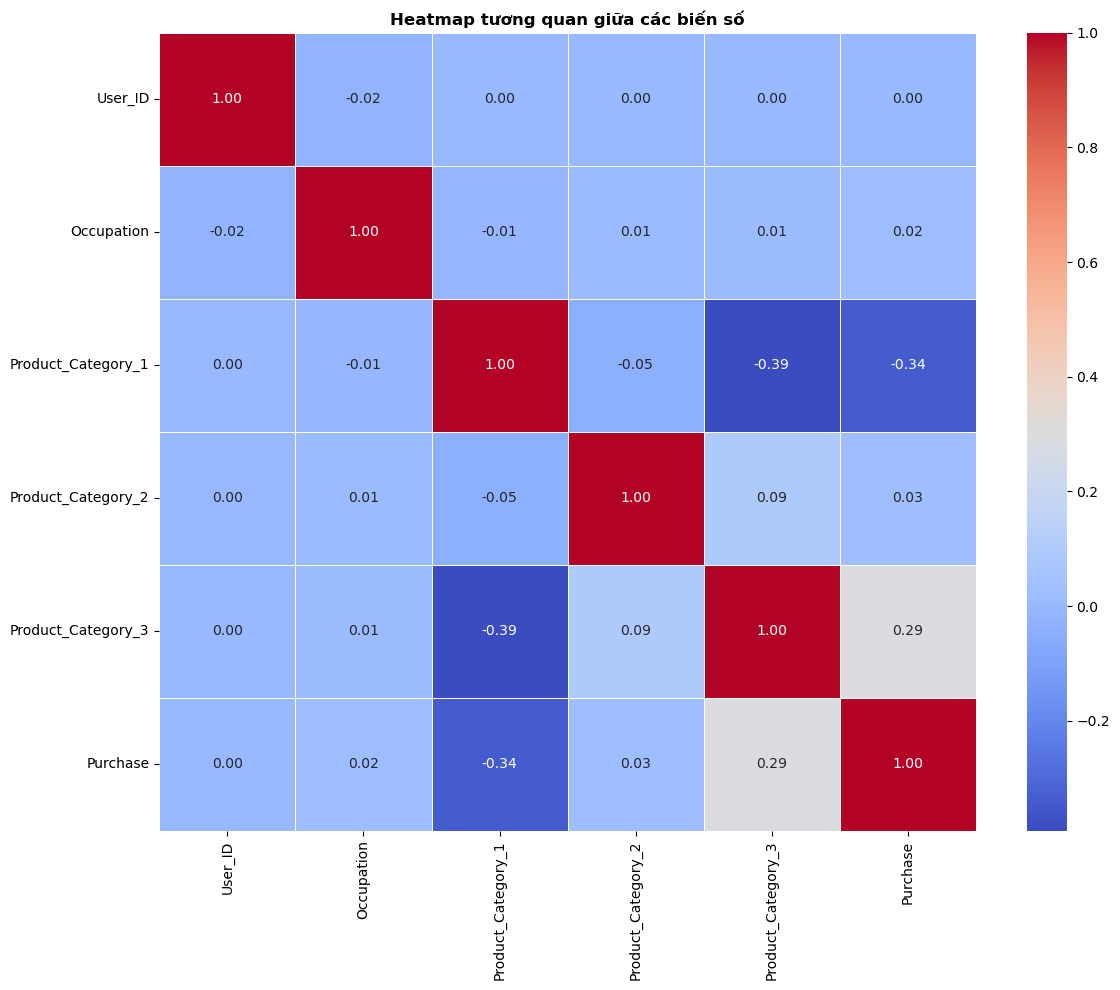

In [13]:
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap tương quan giữa các biến số', fontweight= "bold")
plt.tight_layout()
plt.show()

### Nghề nghiệp và mô hình chi tiêu

C:\Users\sincr\AppData\Local\Temp\ipykernel_25180\1094459889.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Occupation', y='Purchase', data=avg_purchase_by_occupation, palette='viridis')


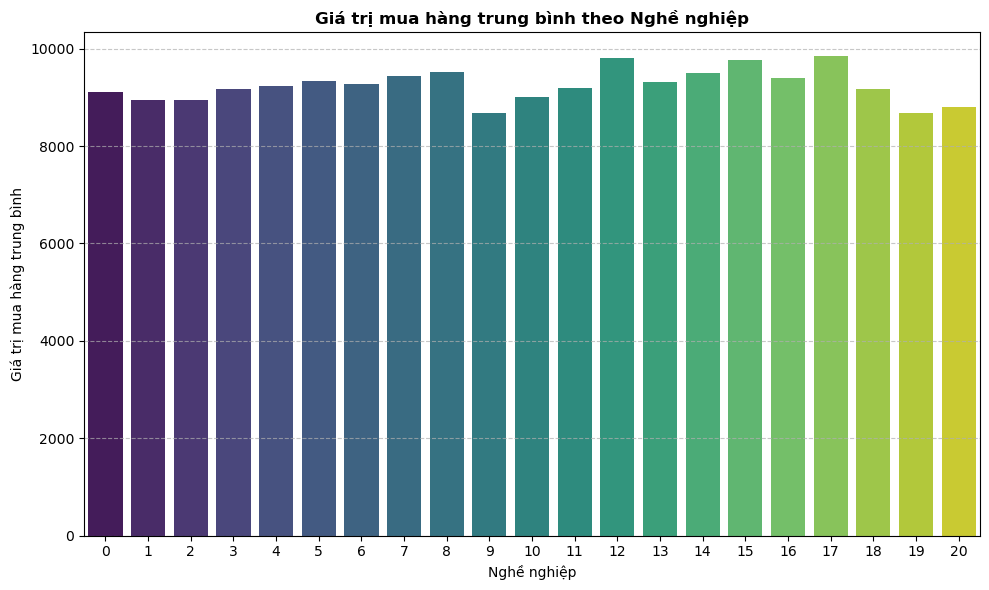

In [14]:
avg_purchase_by_occupation = df.groupby('Occupation', observed=False)['Purchase'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Occupation', y='Purchase', data=avg_purchase_by_occupation, palette='viridis')
plt.title('Giá trị mua hàng trung bình theo Nghề nghiệp', fontweight = 'bold')
plt.xlabel('Nghề nghiệp' )
plt.ylabel('Giá trị mua hàng trung bình')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Phân tích phân phối của Danh mục sản phẩm 1,2 và 3

In [47]:
df_cat1_filtered = df[df['Product_Category_1'] != 0]

product_category_1_counts = df_cat1_filtered['Product_Category_1'].value_counts().sort_index()
avg_purchase_by_product_category_1 = df_cat1_filtered.groupby('Product_Category_1', observed=False)['Purchase'].mean().sort_index()

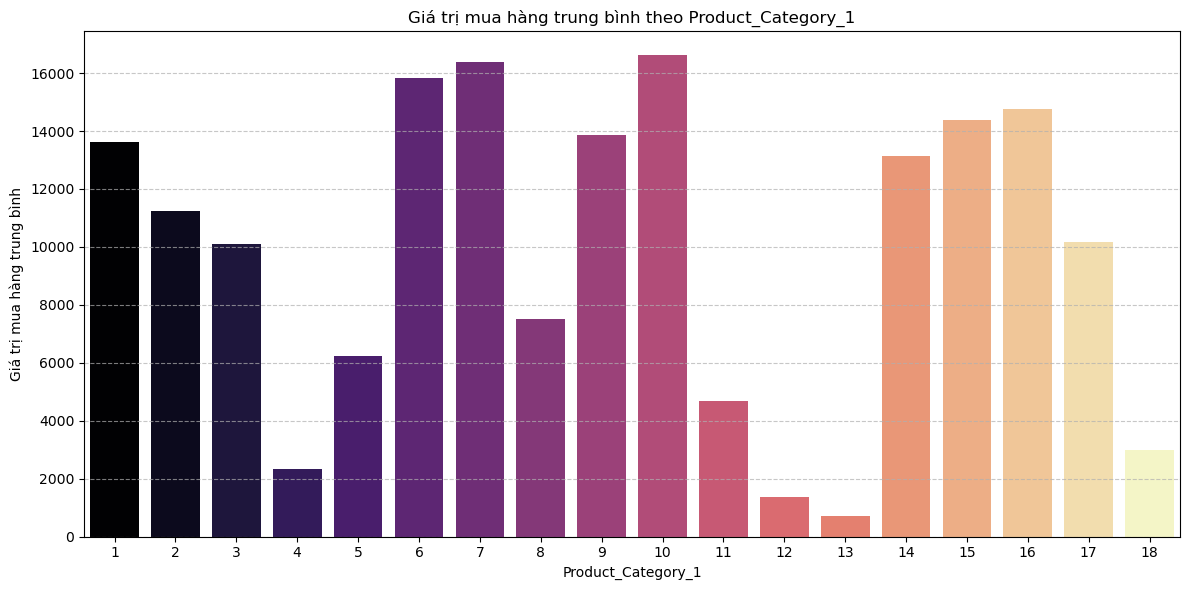

In [44]:
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_purchase_by_product_category_1.index, y=avg_purchase_by_product_category_1.values, palette='magma', hue=avg_purchase_by_product_category_1.index, legend=False)
plt.title('Giá trị mua hàng trung bình theo Product_Category_1')
plt.xlabel('Product_Category_1')
plt.ylabel('Giá trị mua hàng trung bình')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [50]:
df_cat2_filtered = df[df['Product_Category_2'] != 0]

product_category_2_counts = df_cat2_filtered['Product_Category_2'].value_counts().sort_index()
avg_purchase_by_product_category_2 = df_cat2_filtered.groupby('Product_Category_2', observed=False)['Purchase'].mean().sort_index()

print("Đếm số lượng mặt hàng (trừ 0):")
print(product_category_2_counts.head())
print("\nGiá trị mua hàng trung bình (trừ 0):")
print(avg_purchase_by_product_category_2.head())

Đếm số lượng mặt hàng (trừ 0):
Product_Category_2
2.0    48481
3.0     2835
4.0    25225
5.0    25874
6.0    16251
Name: count, dtype: int64

Giá trị mua hàng trung bình (trừ 0):
Product_Category_2
2.0    13621.740682
3.0    11229.532628
4.0    10218.319009
5.0     9034.054649
6.0    11500.585872
Name: Purchase, dtype: float64


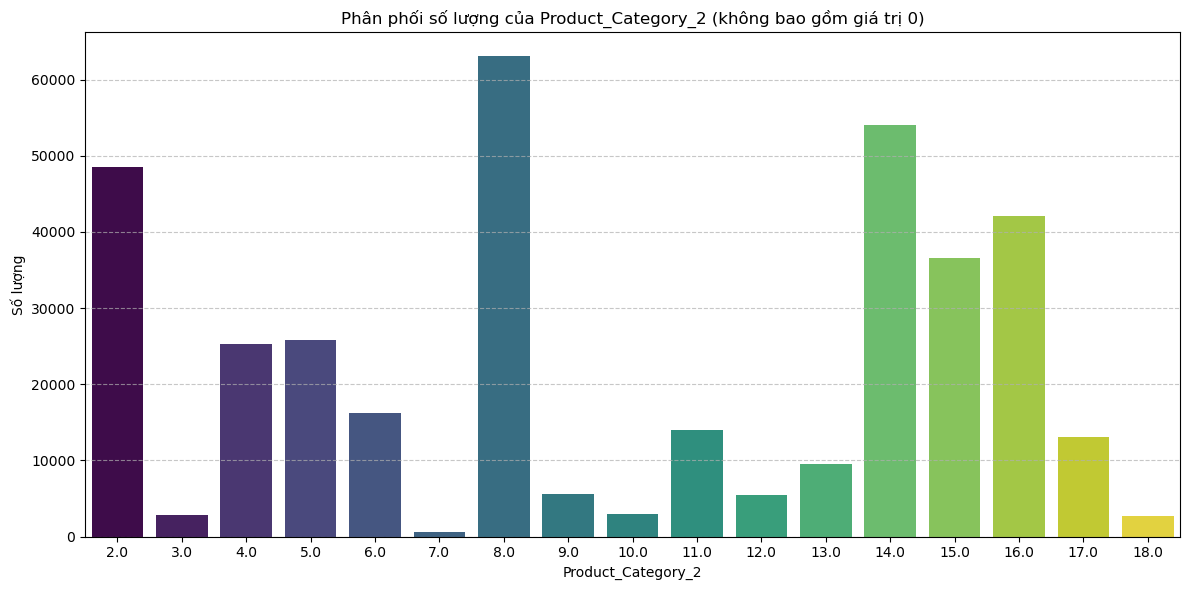

In [49]:
plt.figure(figsize=(12, 6))
sns.barplot(x=product_category_2_counts.index, y=product_category_2_counts.values, palette='viridis', hue=product_category_2_counts.index, legend=False)
plt.title('Phân phối số lượng của Product_Category_2 (không bao gồm giá trị 0)')
plt.xlabel('Product_Category_2')
plt.ylabel('Số lượng')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



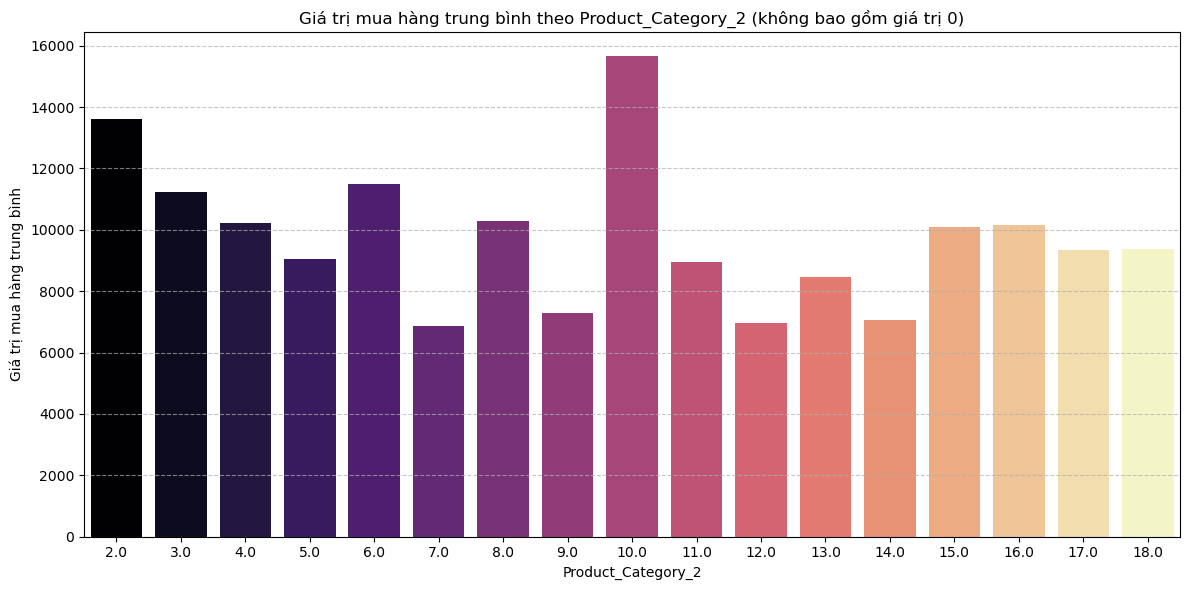

In [35]:
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_purchase_by_product_category_2.index, y=avg_purchase_by_product_category_2.values, palette='magma', hue=avg_purchase_by_product_category_2.index, legend=False)
plt.title('Giá trị mua hàng trung bình theo Product_Category_2 (không bao gồm giá trị 0)')
plt.xlabel('Product_Category_2')
plt.ylabel('Giá trị mua hàng trung bình')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [51]:
df_cat3_filtered = df[df['Product_Category_3'] != 0]

product_category_3_counts = df_cat3_filtered['Product_Category_3'].value_counts().sort_index()
avg_purchase_by_product_category_3 = df_cat3_filtered.groupby('Product_Category_3', observed=False)['Purchase'].mean().sort_index()

print("Đếm số lượng mặt hàng (trừ 0):")
print(product_category_2_counts.head())
print("\nGiá trị mua hàng trung bình (trừ 0):")
print(avg_purchase_by_product_category_3.head())

Đếm số lượng mặt hàng (trừ 0):
Product_Category_2
2.0    48481
3.0     2835
4.0    25225
5.0    25874
6.0    16251
Name: count, dtype: int64

Giá trị mua hàng trung bình (trừ 0):
Product_Category_3
3.0    13957.166667
4.0     9778.290761
5.0    12128.351770
6.0    13189.812785
8.0    13029.554102
Name: Purchase, dtype: float64


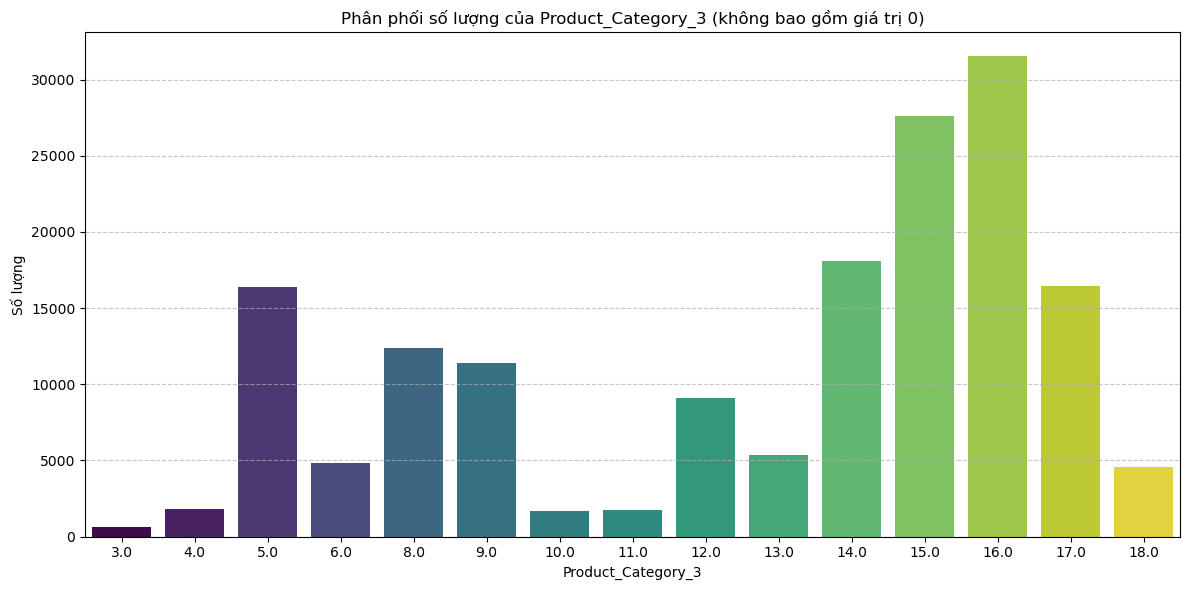

In [34]:
plt.figure(figsize=(12, 6))
sns.barplot(x=product_category_3_counts.index, y=product_category_3_counts.values, palette='viridis', hue=product_category_3_counts.index, legend=False)
plt.title('Phân phối số lượng của Product_Category_3 (không bao gồm giá trị 0)')
plt.xlabel('Product_Category_3')
plt.ylabel('Số lượng')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



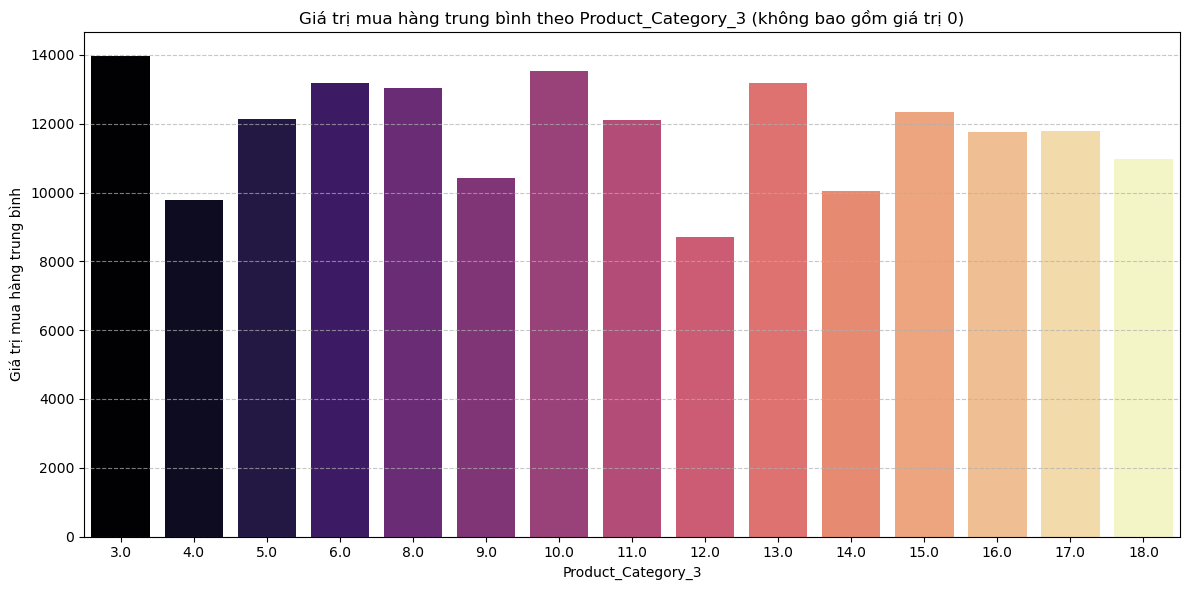

In [33]:
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_purchase_by_product_category_3.index, y=avg_purchase_by_product_category_3.values, palette='magma', hue=avg_purchase_by_product_category_3.index, legend=False)
plt.title('Giá trị mua hàng trung bình theo Product_Category_3 (không bao gồm giá trị 0)')
plt.xlabel('Product_Category_3')
plt.ylabel('Giá trị mua hàng trung bình')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()